In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')

In [3]:
df = pd.concat([mat,por])

In [4]:
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [5]:
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [6]:
df.mother_education.unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [7]:
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
school                   1044 non-null object
sex                      1044 non-null object
age                      1044 non-null int64
address                  1044 non-null object
family_size              1044 non-null object
parents_status           1044 non-null object
mother_education         1044 non-null int64
father_education         1044 non-null int64
mother_job               1044 non-null object
father_job               1044 non-null object
reason                   1044 non-null object
guardian                 1044 non-null object
commute_time             1044 non-null int64
study_time               1044 non-null int64
failures                 1044 non-null int64
school_support           1044 non-null object
family_support           1044 non-null object
paid_classes             1044 non-null object
activities               1044 non-null object
nursery                  1

### Final grade distribution

Text(0, 0.5, 'Number of Student')

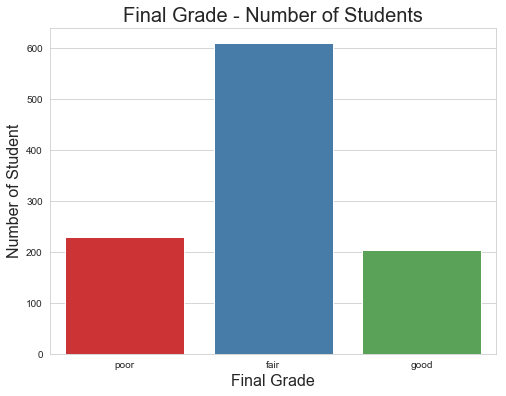

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

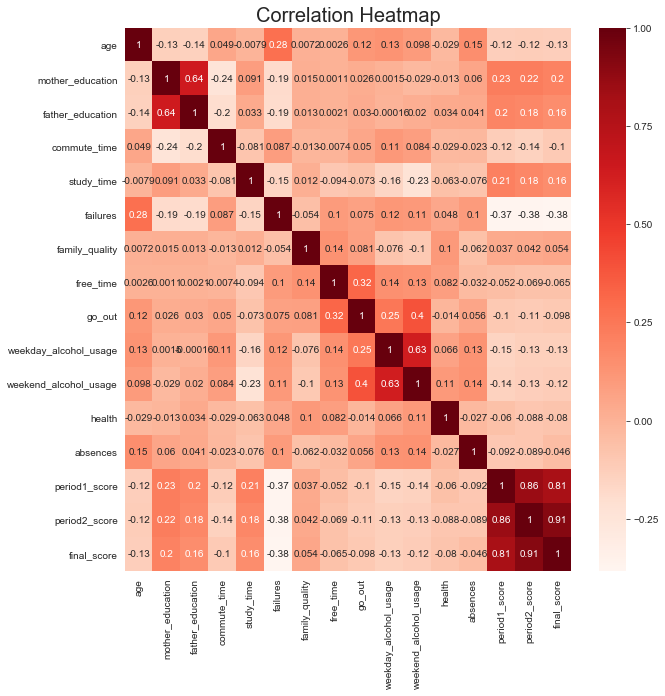

In [10]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [11]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

In [12]:
print(romance_perc)

romantic           no       yes
final_grade                    
poor         0.308956  0.324771
fair         0.379735  0.377394
good         0.311308  0.297835


<Figure size 432x288 with 0 Axes>

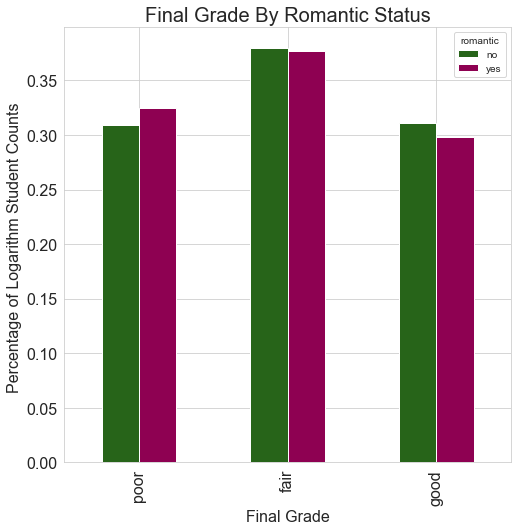

In [13]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

### Romantic status has a significant correlation with final grade

Suggestion: No high school romance

### Final Grade By Alcohol Consumption

In [15]:
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

C:\Users\Nastassia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nastassia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Nastassia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result e

Text(0.5, 0, 'Level of Alcohol Consumption')

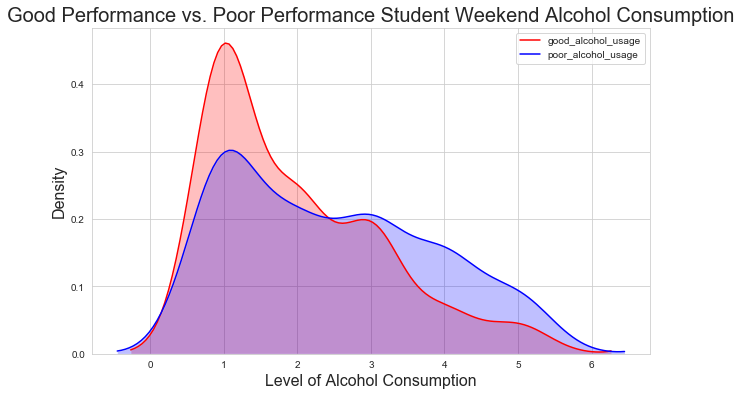

In [16]:
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage

poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

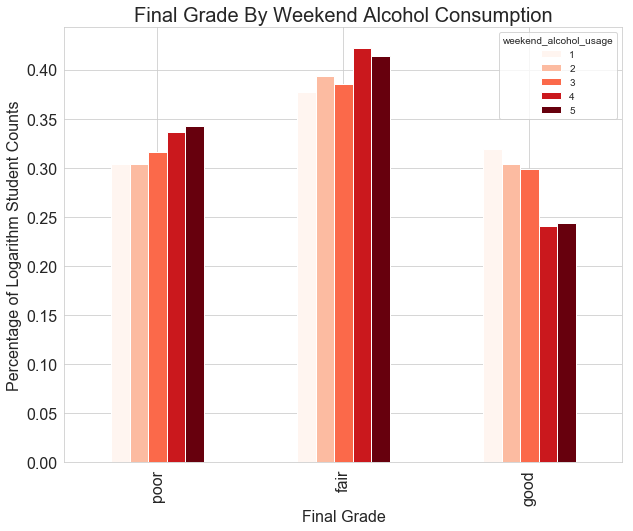

In [17]:
alc_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

### Weekend alcohol consumption has a significant correlation with final grade.

Suggestion: No drinking

### Final Grade By Parents Education Level

In [19]:
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

C:\Users\Nastassia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nastassia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nastassia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Text(0.5, 0, 'Father Education Level')

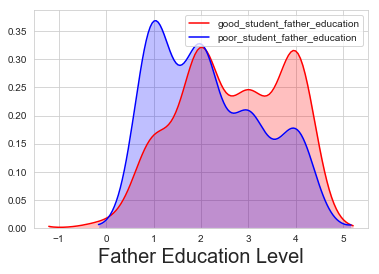

In [20]:
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)

Text(0.5, 0, 'Mother Education Level')

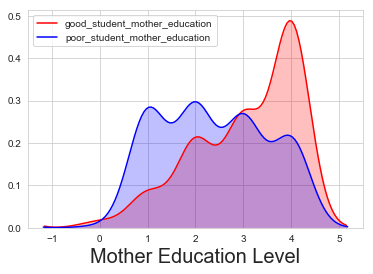

In [21]:
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)

### Parents education level has a positive correlation with students final score. Comparatively, mother's education level has bigger influence than father's education level.

In [22]:
X_edu = df[['mother_education','father_education']]
y_edu = df.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_score   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2287.
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:20:09   Log-Likelihood:                -3194.8
No. Observations:                1044   AIC:                             6394.
Df Residuals:                    1042   BIC:                             6403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.4078      0.166     14.527      0.000       2.083       2.733
father_education     1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Suggestion: If you're woman study hard, if you're man marry someone with higher education.

### Final Grade By Frequency Of Going Out

Text(0.5, 0, 'Final Grade')

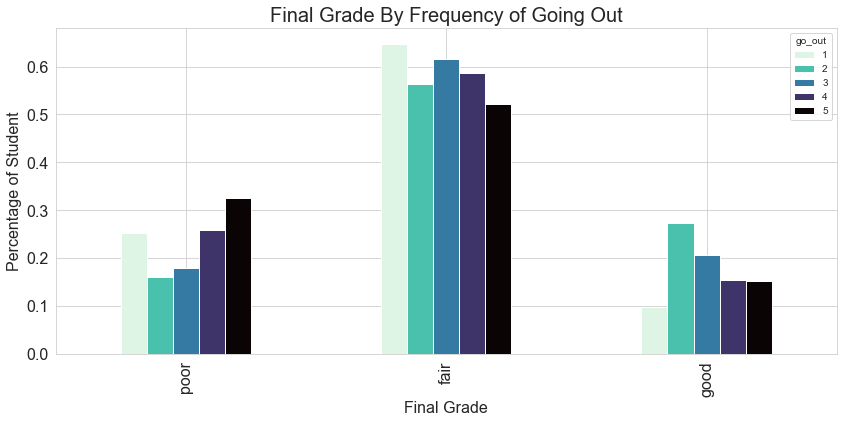

In [23]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

### Frequency of going out with friends has a significant correlation with students final performance.

Suggestion: Limit the frequance of your kids going out.

### Final Grade By Desire To Go To College

In [24]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Age')

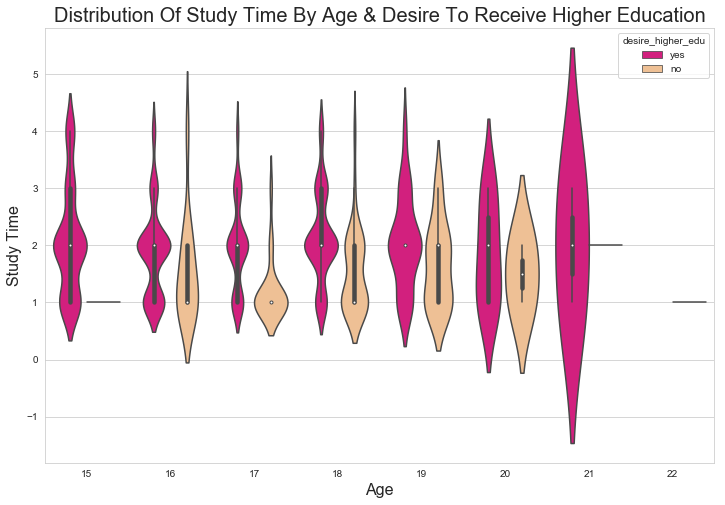

In [25]:
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

Text(0, 0.5, 'Percentage of Student')

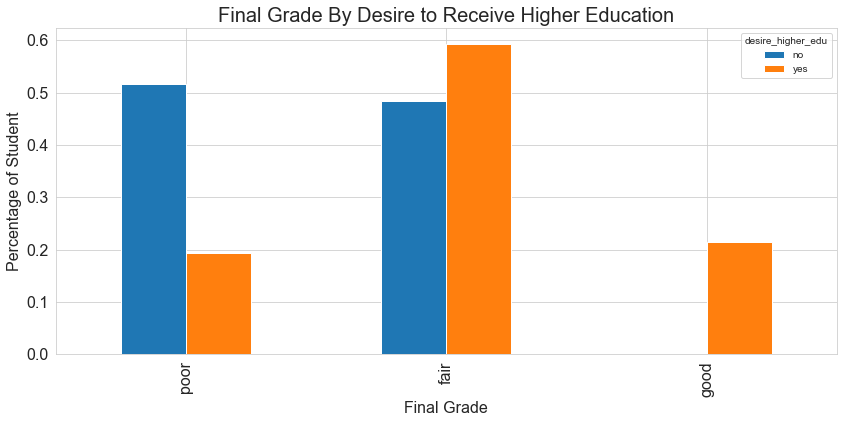

In [26]:
higher_perc.plot.bar (figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

### Desire of going to college has a significant correlation with students final performance.

### Final Grade By Living Area

In [27]:
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

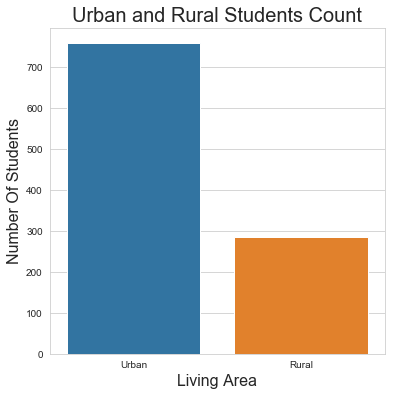

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(df.address)
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [29]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

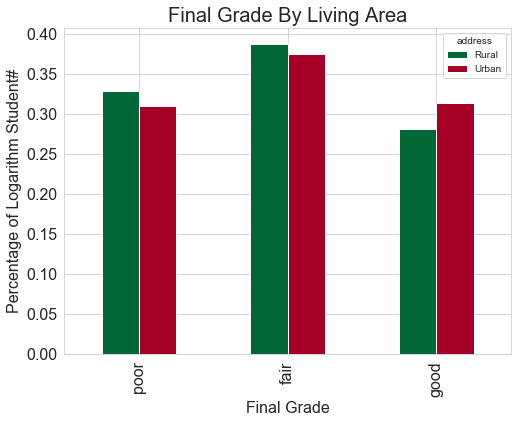

In [30]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

### The frequency of going out with friends has a significant correlation with students final performance.

Suggestion: Stay in the city

### Classification

In [31]:
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [33]:
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [34]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nastassia\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [38]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
lr.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
y_pred = lr.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9299363057324841


### Decision Tree Classification

In [43]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': [3,5,7,9],'min_samples_leaf': [3,5]}
tree_grid = GridSearchCV(tree, tree_params,cv=5, n_jobs=-1,verbose=True)
tree_grid.fit(X_train, y_train)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
accuracy_score(y_test, tree_grid.predict(X_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_depth': 5, 'min_samples_leaf': 5}
0.8780821917808219


[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.4s finished


0.8471337579617835

In [45]:
y_tree = tree.predict(X_test)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_tree))

Accuracy: 0.8821656050955414


In [47]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
!pip install graphviz

### Random Forest Classification

In [48]:
forest = RandomForestClassifier(n_estimators=100, min_samples_leaf= 5, max_depth=5)
forest.fit(X_train, y_train)
y_forest = forest.predict(X_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_forest))

Accuracy: 0.8407643312101911


### Support Vector Classification

In [50]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
y_svc = s.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_svc))

Accuracy: 0.7643312101910829


### Regression

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score

In [60]:
dfr = df.copy()
dfr = dfr.drop([ 'final_grade', 'period1_score', 'period2_score'], axis=1)

In [61]:
y = dfr['final_score']
X = dfr.drop(['final_score'], axis=1)

In [62]:
X = pd.get_dummies(X)

In [63]:
names = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso']

clf_list = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso()]

In [64]:
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(cross_val_score(clf, X, y, cv=5).mean())

DecisionTreeRegressor: 0.5221602769899949
LinearRegression: 0.7843175947148374
Ridge: 0.7844755628870714
Lasso: 0.8025331734825898


In [65]:
tree = DecisionTreeRegressor()
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [66]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature period2_score (0.817445)
2. Feature absences (0.063006)
3. Feature go_out (0.010785)
4. Feature weekday_alcohol_usage (0.009915)
5. Feature age (0.008983)
6. Feature paid_classes_no (0.007034)
7. Feature health (0.006095)
8. Feature school_MS (0.005970)
9. Feature weekend_alcohol_usage (0.005808)
10. Feature father_education (0.005590)
11. Feature mother_education (0.005421)
12. Feature period1_score (0.005327)
13. Feature sex_F (0.005301)
14. Feature family_quality (0.004466)
15. Feature reason_home (0.004353)
16. Feature mother_job_services (0.003859)
17. Feature mother_job_teacher (0.003486)
18. Feature commute_time (0.003400)
19. Feature family_size_LE3 (0.002867)
20. Feature father_job_services (0.001821)
21. Feature activities_yes (0.001697)
22. Feature study_time (0.001687)
23. Feature nursery_yes (0.001513)
24. Feature free_time (0.001504)
25. Feature reason_reputation (0.001390)
26. Feature family_size_GT3 (0.001092)
27. Feature failures (0.000919)
28. Feature mothe